In [254]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [255]:
from embcomp.test_cases.utils import plot
from embcomp.test_cases.neighborhood import plot_neighborhood

def gather_test_cases():
    import embcomp.test_cases.neighborhood as mod
    return [
        getattr(mod, name)
        for name in filter(lambda x: x.startswith("case"), dir(mod))
    ]

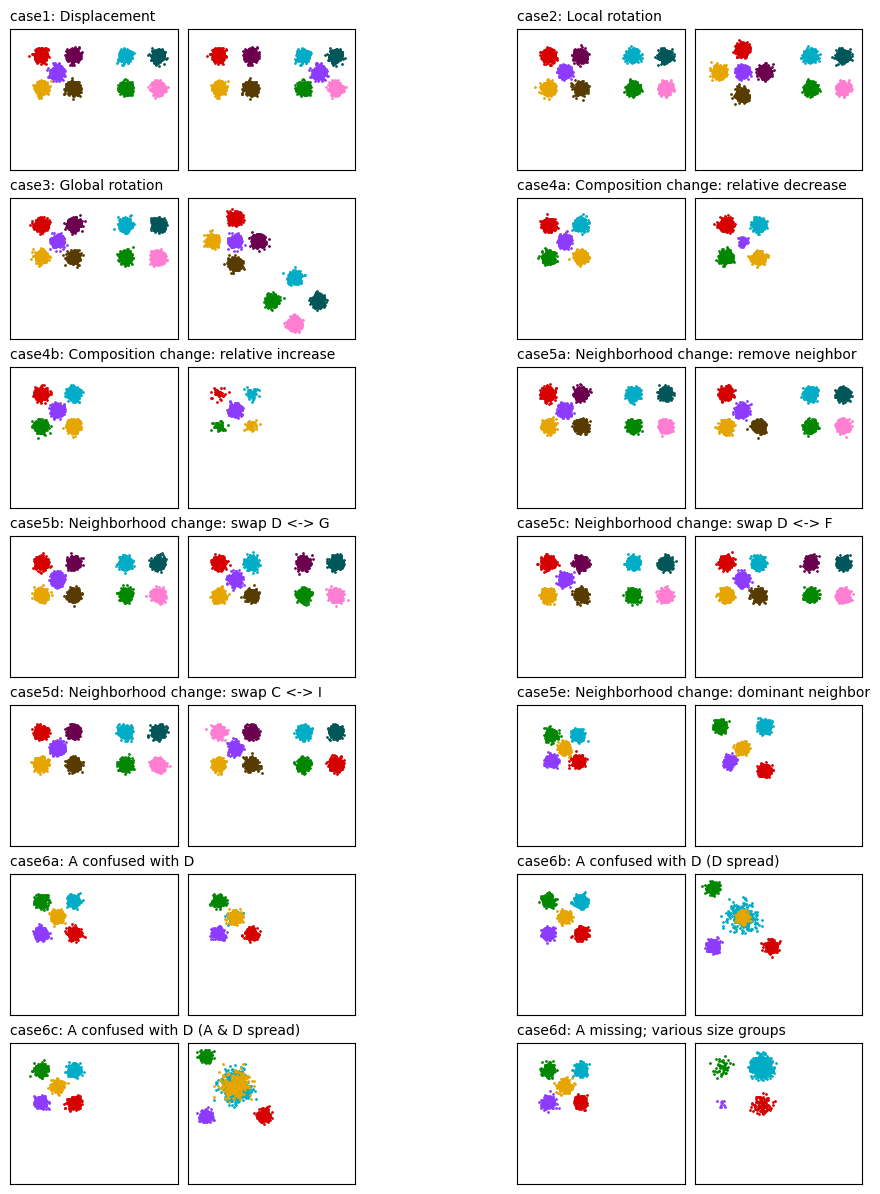

In [256]:
import matplotlib.pyplot as plt
from math import ceil

cases = gather_test_cases()

fig, axs = plt.subplots(ncols=2, nrows=ceil(len(cases) / 2), figsize=(12, 15), sharex=True, sharey=True)

for ax, case in zip(axs.flat, cases):
    ax.set_title(f"{case.__name__}: {case.__doc__}", fontsize='medium', loc='left') 
    plot(*case(), ax=ax)

## Testing

In [259]:
import functools

from embcomp.test_cases.metrics import count_first, fixed_k

def run(metrics):
    cases = gather_test_cases()
    for case in cases:
        plot_neighborhood(*case(), metrics=metrics, name=f"{case.__name__}: {case.__doc__}")

### Fixed _k_

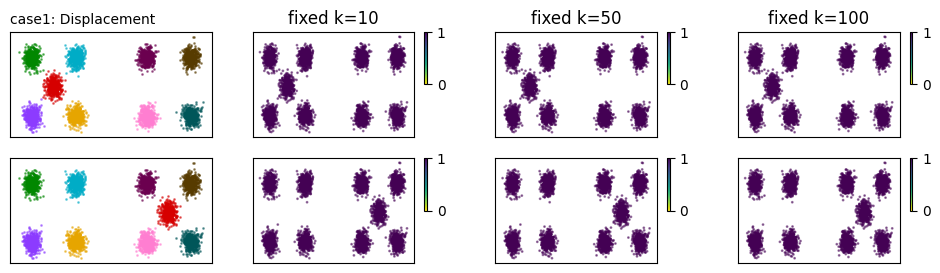

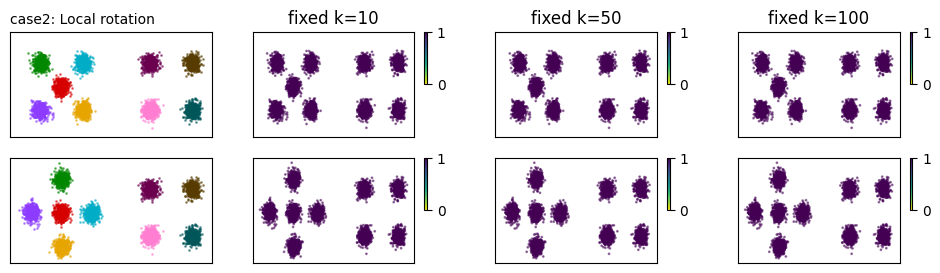

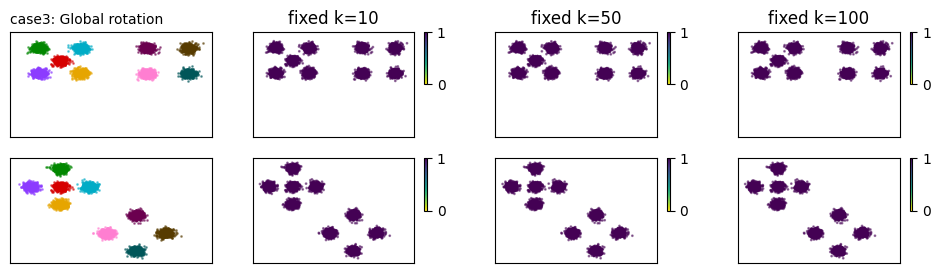

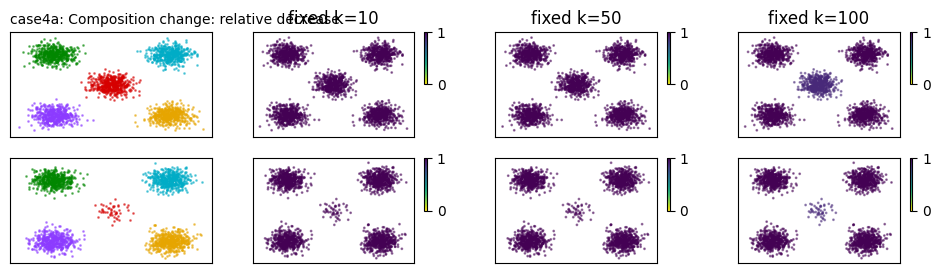

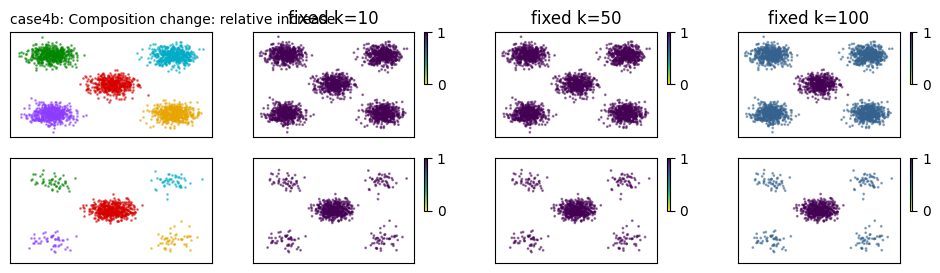

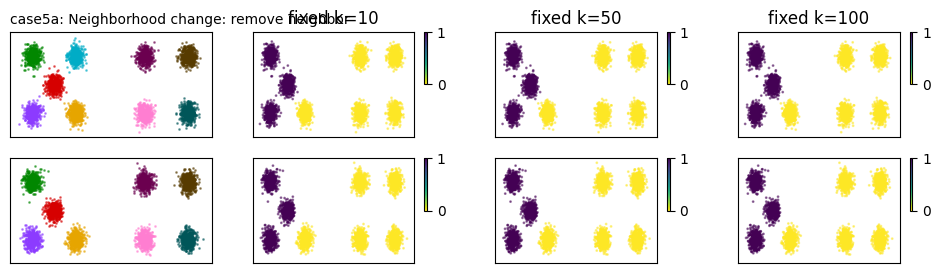

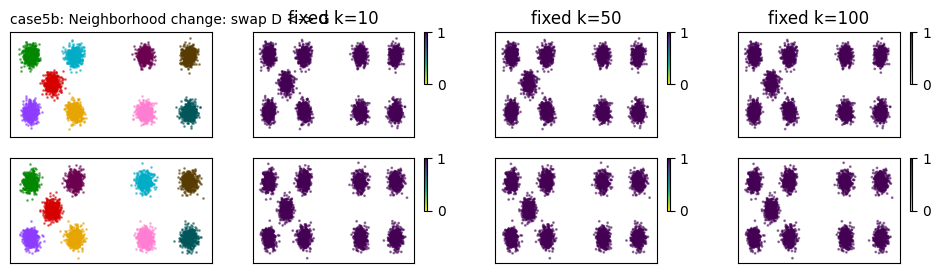

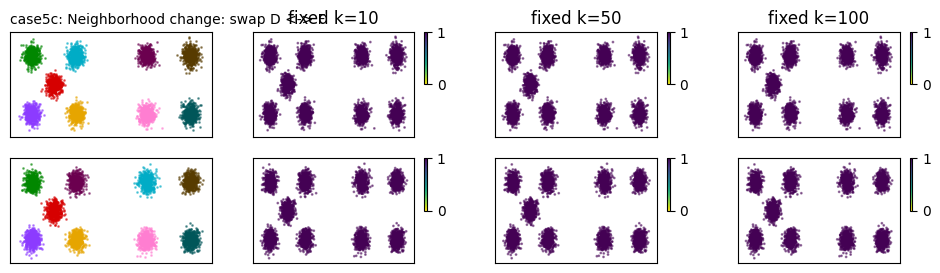

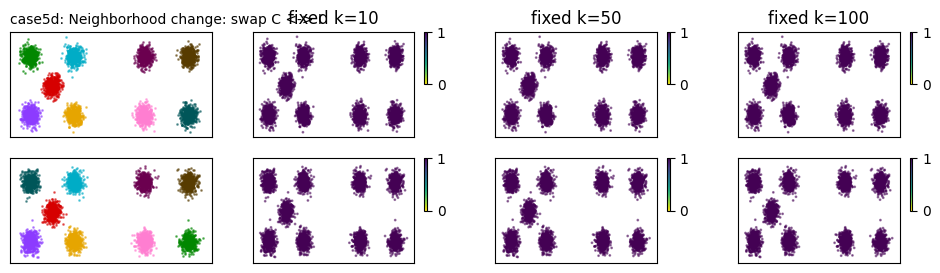

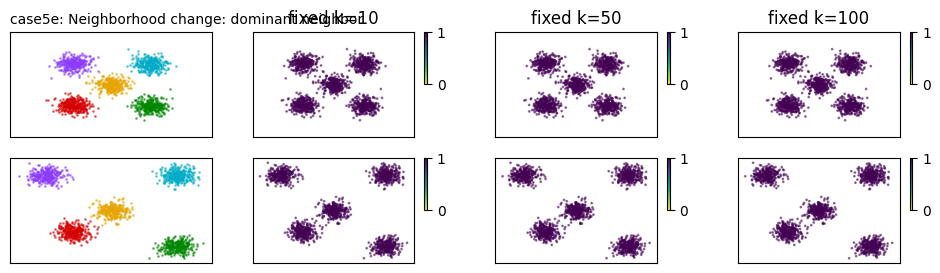

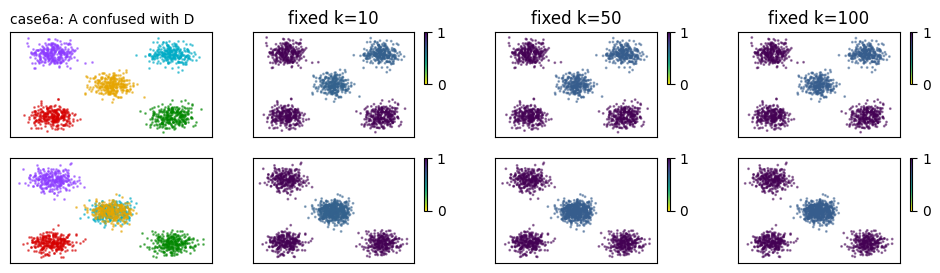

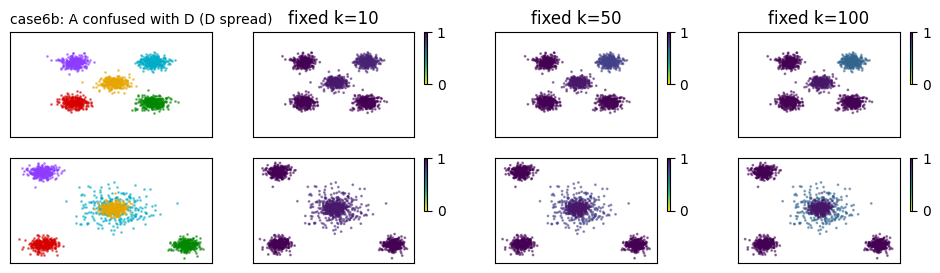

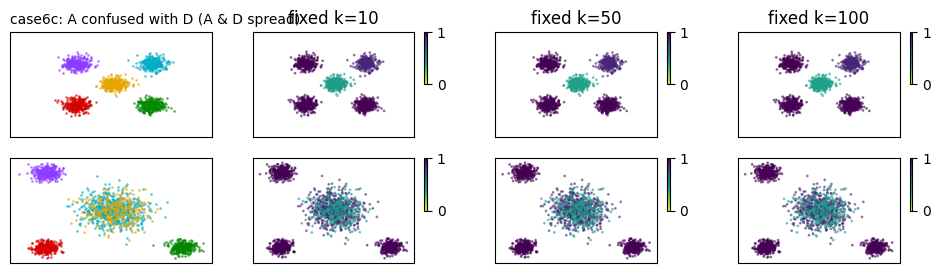

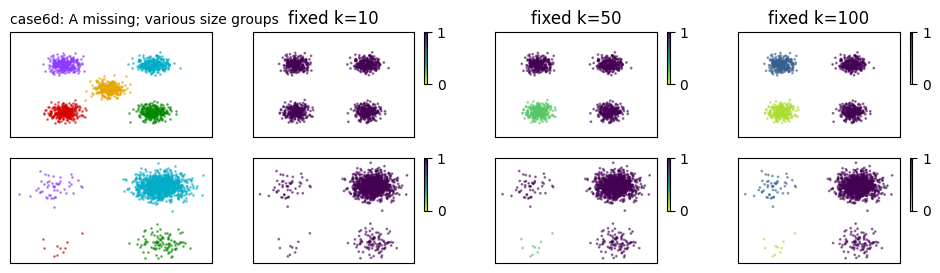

In [ ]:
run([
    ("fixed k=10", functools.partial(fixed_k, k=10)),
    ("fixed k=50", functools.partial(fixed_k, k=50)),
    ("fixed k=100", functools.partial(fixed_k, k=100)),
])

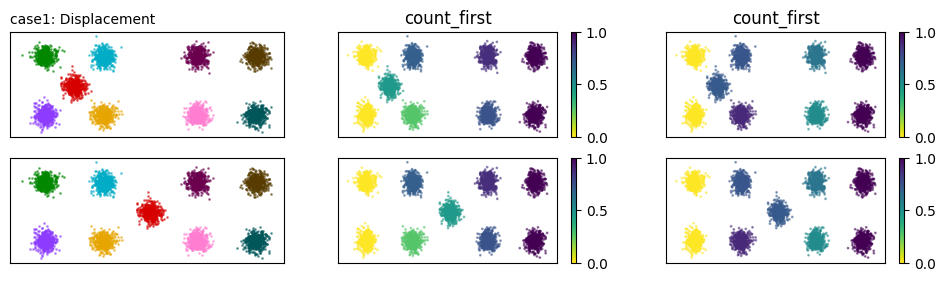

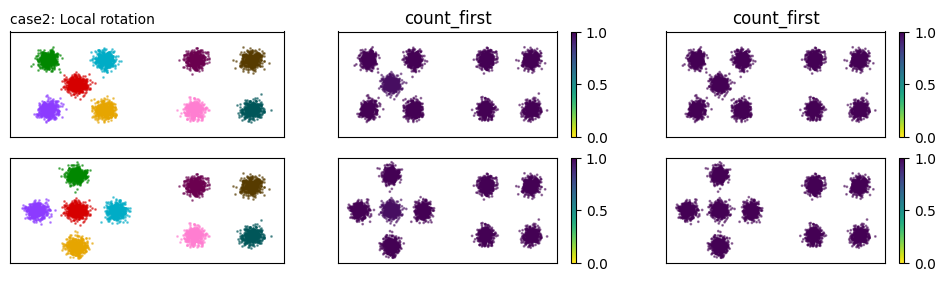

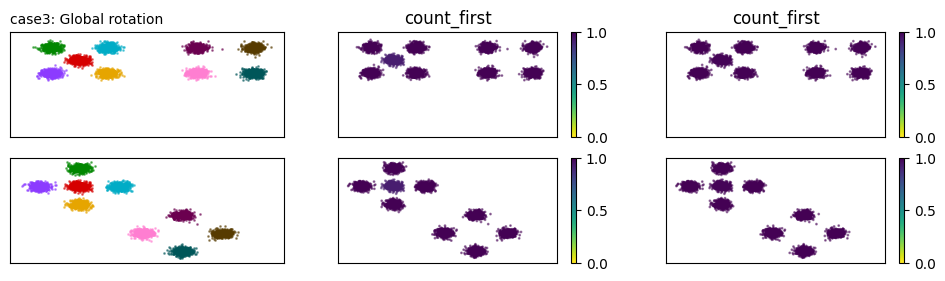

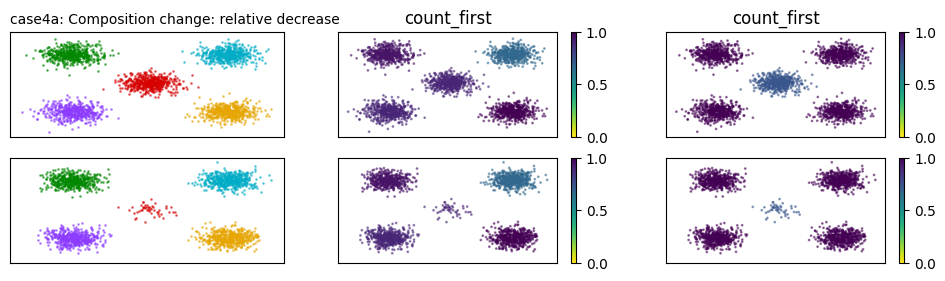

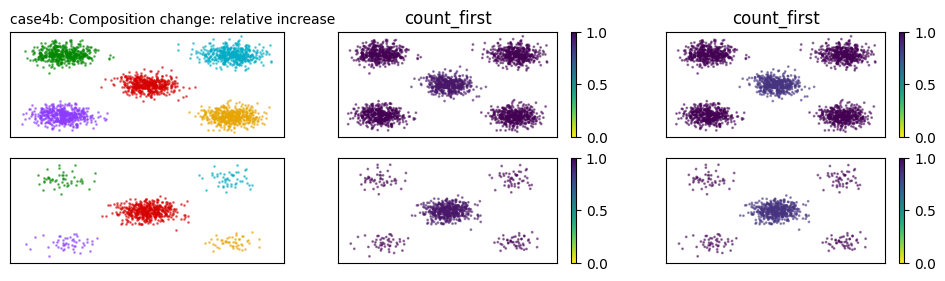

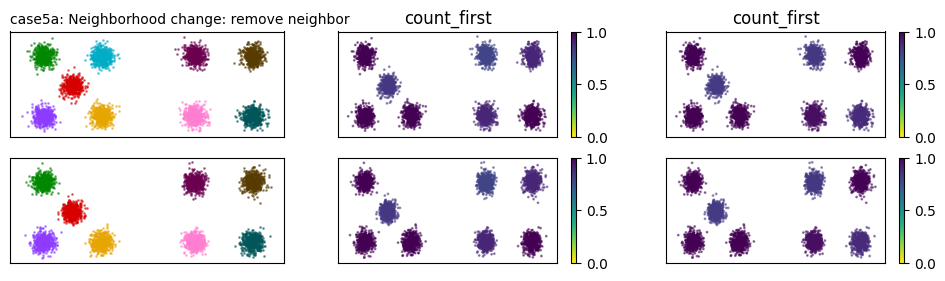

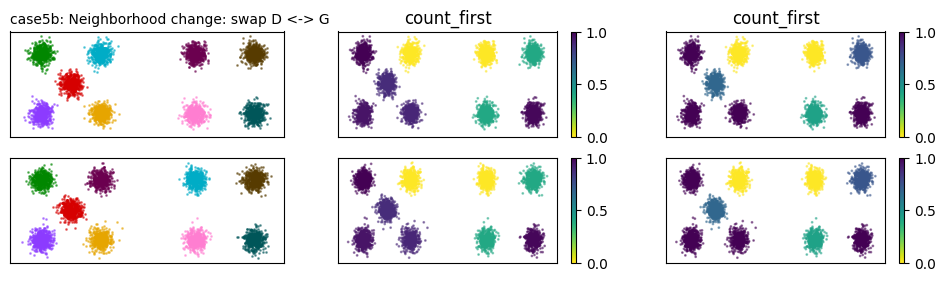

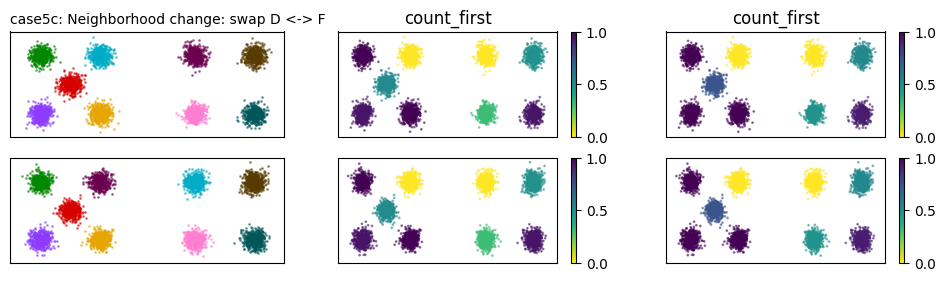

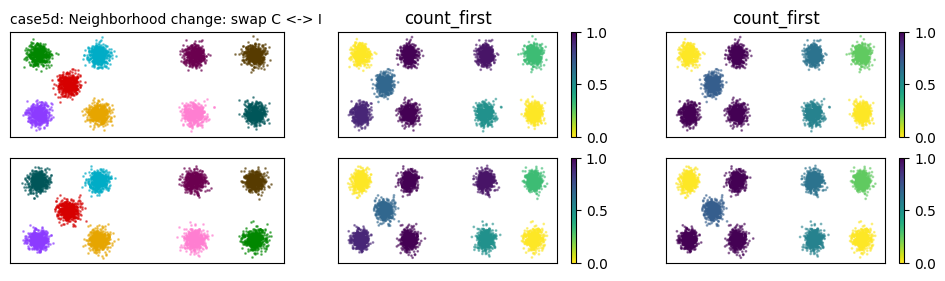

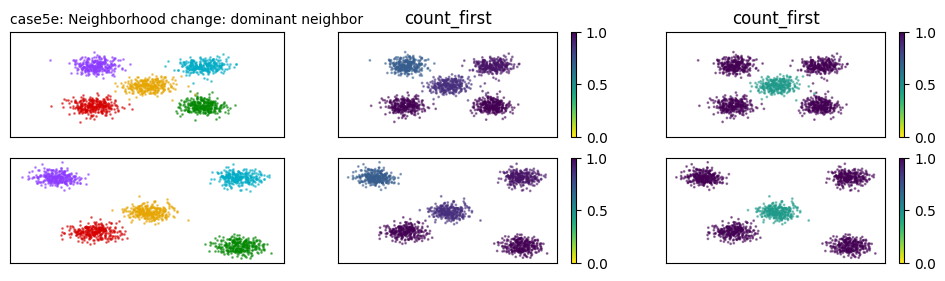

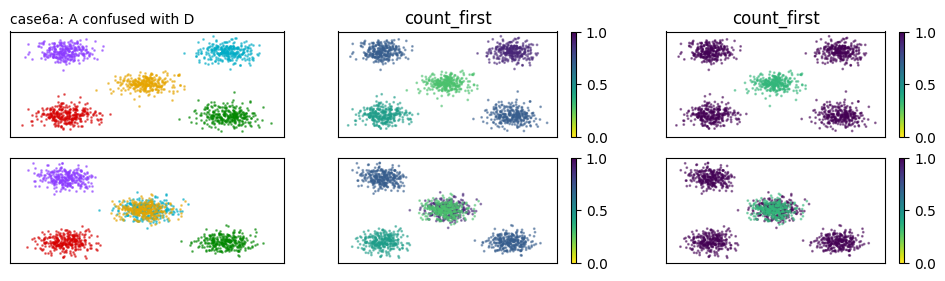

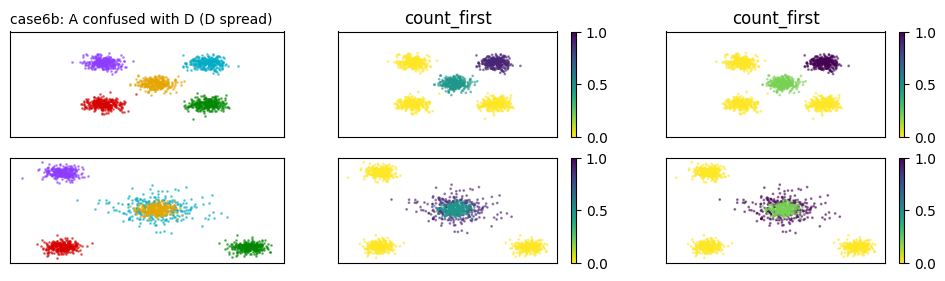

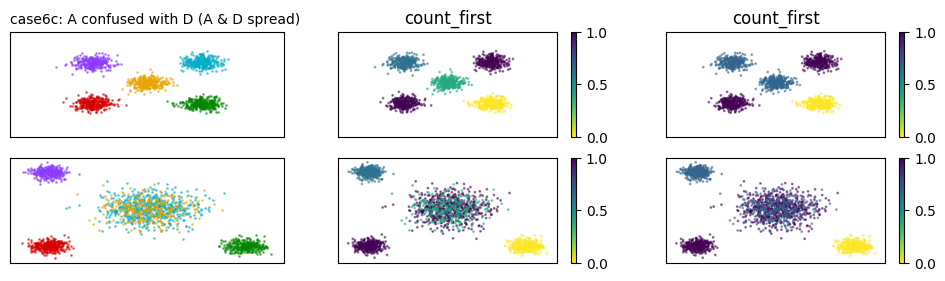

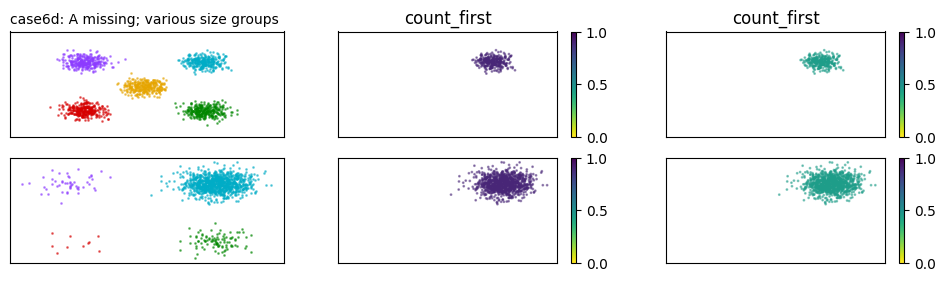

In [277]:
run([
    ("count_first", functools.partial(count_first, kind="set")),
    ("count_first", functools.partial(count_first, kind="sum")),
])

In [273]:
a, b = cases[0]()
count_first(a, kind="set")

,A,B,C,D,E,F,G,H,I
label,,,,,,,,,
A,0,2,1,3,2,0,0,0,0
B,2,0,0,0,0,0,0,0,0
C,2,0,0,0,0,0,0,0,0
D,3,0,0,0,0,0,0,0,0
E,5,0,0,0,0,0,0,0,0
F,0,0,0,0,0,0,1,0,1
G,0,0,0,0,0,3,0,2,0
H,0,0,0,0,0,0,3,0,2
I,0,0,0,0,0,1,0,1,0


In [308]:
from embcomp.test_cases.metrics import dynamic_k

a, b = cases[0]()


dynamic_k(a)

,A,B,C,D,E,F,G,H,I
label,,,,,,,,,
A,488,0,0,0,0,0,0,0,0
B,0,485,0,0,0,0,0,0,0
C,0,0,488,0,0,0,0,0,0
D,0,0,0,489,0,0,0,0,0
E,0,0,0,0,490,0,0,0,0
F,0,0,0,0,0,495,0,0,0
G,0,0,0,0,0,0,490,0,0
H,0,0,0,0,0,0,0,491,0
I,0,0,0,0,0,0,0,0,488
